# ClusterAI 2020
Ciencia de Datos - Ingenieria Industrial UTN BA
Curso I5521

## Importación de Librerias

In [1]:
#Importar paquetes de herramientas:

#Datos
import pandas as pd
import numpy as np
#Graficos 
import matplotlib.pyplot as plt
import seaborn as sns
#Otros 
import warnings
warnings.filterwarnings('ignore')


## Importación de Dataset

In [2]:
file = 'base_estudio_discapacidad_2018.csv'

In [3]:
estudio = pd.read_csv(file, engine = 'python', error_bad_lines=False, delimiter= ';')

# Uso engine= 'python' y Erro_bad_lines = False porque sino tira un error al leer cierto tipo de lineas.

# Error_bad_lines lo uso para.Las líneas con demasiados campos (por ejemplo, una línea csv con demasiadas comas) 
# provocarán de forma predeterminada que se genere una excepción y no se devolverá ningún DataFrame. 
# Si es False, estas "líneas incorrectas" se eliminarán del DataFrame que se devuelve.

# Engine = 'python' lo uso para cuando
# Se genera una advertencia al leer un archivo que no usa el analizador 'c' predeterminado.
# Ocurre debido a la falta de soporte o funcionalidad para analizar un atributo particular de un archivo CSV con el motor solicitado.
# La advertencia se puede evitar agregando engine = 'python' como parámetro en los métodos pd.read_csv y pd.read_table .

# Uso delimiter=';' para separar las columnas al leerlas

## Filtrado del Dataset

In [4]:
# Nos quedamos con las variables/features que nos interesan del Dataset

estudio_dif = estudio[['personas_hogar', 'Sexo' , 'hogar_dificultad', 'personas_dificultad_hogar' , 'tipo_hogar' , 'edad_agrupada', 'Cantidad de dificultades' , 'Cantidad y tipo de dificultad' , 'edad_inicio' , 'Cobertura de salud' , 'Sabe leer y escribir' , 'Máximo nivel educativo alcanzado' ,'Condición de actividad']]



In [5]:
# Filtramos el Dataset por las personas con dificultades (discapacidad) que son el grupo que vamos a estudiar

estudio_disca = estudio_dif.loc[estudio['hogar_dificultad']== 'Hogares con personas con dificultad']



In [6]:
# Filtramos el Dataset por Edad y dejamos los grupos que tienen personas en edad Laboral "14 a 39 años" y "40 a 64 años"

estudio_discapacidad = estudio_disca.loc[(estudio['edad_agrupada'] != '0 a 5 años') & (estudio['edad_agrupada'] != '6 a 13 años') & (estudio['edad_agrupada'] != '65 años y más') ]

In [7]:
np.shape(estudio_discapacidad)

(13787, 13)

In [8]:
# Sabemos que hay valores vacios en la columna 'Condición de actividad' entonces los convertimos a Nans

estudio_discapacidad['Condición de actividad'].replace(' ', np.nan, inplace=True)


In [9]:
estudio_discapacidad.head(5)

,personas_hogar,Sexo,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,edad_agrupada,Cantidad de dificultades,Cantidad y tipo de dificultad,edad_inicio,Cobertura de salud,Sabe leer y escribir,Máximo nivel educativo alcanzado,Condición de actividad
4,3,Mujer,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,40 a 64 años,,,,,,,NaN
6,3,Mujer,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,14 a 39 años,,,,,,,NaN
13,2,Varón,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,40 a 64 años,4,Solo certificado,40 a 64 años,Obra social o PAMI,Sí,Secundario incompleto,Inactivo
14,2,Mujer,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,40 a 64 años,,,,,,,NaN
15,1,Varón,Hogares con personas con dificultad,1,Hogar unipersonal,40 a 64 años,2,Dos dificultades,40 a 64 años,Obra social o PAMI,Sí,Secundario incompleto,Inactivo


In [10]:
# Verificamos los Nans en las columnas

col_NaN = estudio_discapacidad.isnull().any()
print(col_NaN,'\r\n')

personas_hogar                      False
Sexo                                False
hogar_dificultad                    False
personas_dificultad_hogar           False
tipo_hogar                          False
edad_agrupada                       False
Cantidad de dificultades            False
Cantidad y tipo de dificultad       False
edad_inicio                         False
Cobertura de salud                  False
Sabe leer y escribir                False
Máximo nivel educativo alcanzado    False
Condición de actividad               True
dtype: bool 



In [11]:
# Limpiamos registros con '.dropna'

estudio_discapacidad.dropna(how ='any', inplace = True)

In [12]:
#Nos fijamos como quedo conformado nuestro Dataset. Cuantas muestras quedaron luego del filtro.

np.shape(estudio_discapacidad)

(4389, 13)

In [13]:
# Pasamos los valores de 'Cantidad de dificultades' de varriables object a numeros 'int'

estudio_discapacidad['Cantidad de dificultades'] = estudio_discapacidad['Cantidad de dificultades'].astype(int)

In [14]:
# Sabemos que hay valores vacios entonces los convertimos a Nans

estudio_discapacidad['Máximo nivel educativo alcanzado'].replace(' ', np.nan, inplace=True)


In [15]:
# Rellenamos para los valores Nans de la columna 'Maximo nivel educativo alcanzado' con la leyenda 'No especifica nivel/ignorado'

estudio_discapacidad["Máximo nivel educativo alcanzado"].fillna("No especifica nivel/ignorado", inplace = True) 

In [16]:
# Renombramos algunos atributos de la columna 'Cantidad y tipo de dificultad'

estudio_discapacidad['Cantidad y tipo de dificultad'] = estudio_discapacidad['Cantidad y tipo de dificultad'].map({'Dos dificultades' : 'Tiene 2 dificultades' ,'Tres dificultades o más': 'Tiene 3 dificultades o más', 'Solo certificado':'Solo tiene certificado', 'Solo visual' : 'Solo visual', 'Solo auditiva' : 'Solo auditiva' , 'Solo mental-cognitiva' : 'Solo mental-cognitiva' , 'Solo del habla y la comunicación' : 'Solo del habla y la comunicación' , 'Solo motora' : 'Solo motora' , 'Solo del cuidado de sí' : 'Solo del cuidado de sí' })

In [17]:
filas = np.shape(estudio_discapacidad)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(estudio_discapacidad)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}\r\n')


estudio_discapacidad.head(5)

Filas: 4389
Columnas: 13



,personas_hogar,Sexo,hogar_dificultad,personas_dificultad_hogar,tipo_hogar,edad_agrupada,Cantidad de dificultades,Cantidad y tipo de dificultad,edad_inicio,Cobertura de salud,Sabe leer y escribir,Máximo nivel educativo alcanzado,Condición de actividad
13,2,Varón,Hogares con personas con dificultad,1,Hogar multipersonal familiar extendido,40 a 64 años,4,Solo tiene certificado,40 a 64 años,Obra social o PAMI,Sí,Secundario incompleto,Inactivo
15,1,Varón,Hogares con personas con dificultad,1,Hogar unipersonal,40 a 64 años,2,Tiene 2 dificultades,40 a 64 años,Obra social o PAMI,Sí,Secundario incompleto,Inactivo
92,3,Mujer,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,14 a 39 años,3,Tiene 3 dificultades o más,,Obra social o PAMI,No,No especifica nivel/ignorado,Inactivo
138,3,Mujer,Hogares con personas con dificultad,1,Hogar multipersonal familiar nuclear,40 a 64 años,2,Tiene 2 dificultades,Todavía no había cumplido el año,Obra social o PAMI,Sí,"Superior no universitario, universitario y pos...",Inactivo
151,7,Mujer,Hogares con personas con dificultad,2,Hogar multipersonal familiar extendido,40 a 64 años,1,Solo visual,,Obra social o PAMI,Sí,Secundario incompleto,Inactivo


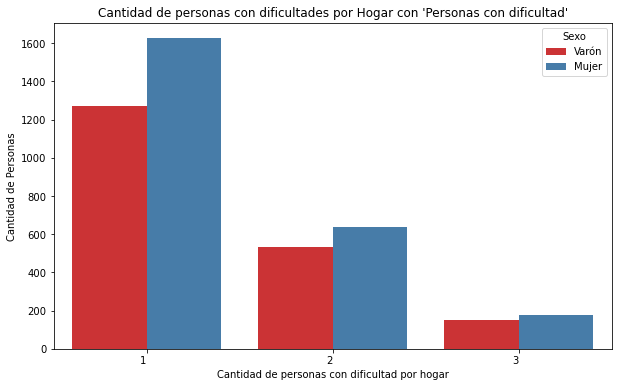

In [18]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="personas_dificultad_hogar", hue = "Sexo" , order = ['1'  , '2' , '3'] , data=estudio_discapacidad , palette = 'Set1')
ax.set(xlabel="Cantidad de personas con dificultad por hogar", ylabel = "Cantidad de Personas")
ax.set_xticklabels(ax.get_xticklabels(),  ha="right")
plt.title("Cantidad de personas con dificultades por Hogar con 'Personas con dificultad'")
plt.show()

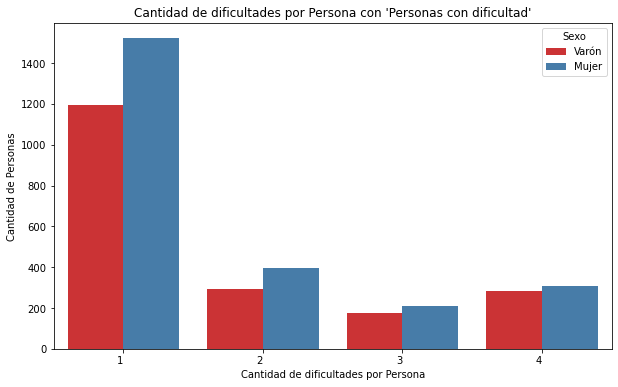

In [19]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Cantidad de dificultades", hue = "Sexo"  , data=estudio_discapacidad , palette = 'Set1')
ax.set(xlabel="Cantidad de dificultades por Persona", ylabel = "Cantidad de Personas")
ax.set_xticklabels(ax.get_xticklabels(),  ha="right")
plt.title("Cantidad de dificultades por Persona con 'Personas con dificultad'")
plt.show()

<Figure size 1008x432 with 0 Axes>

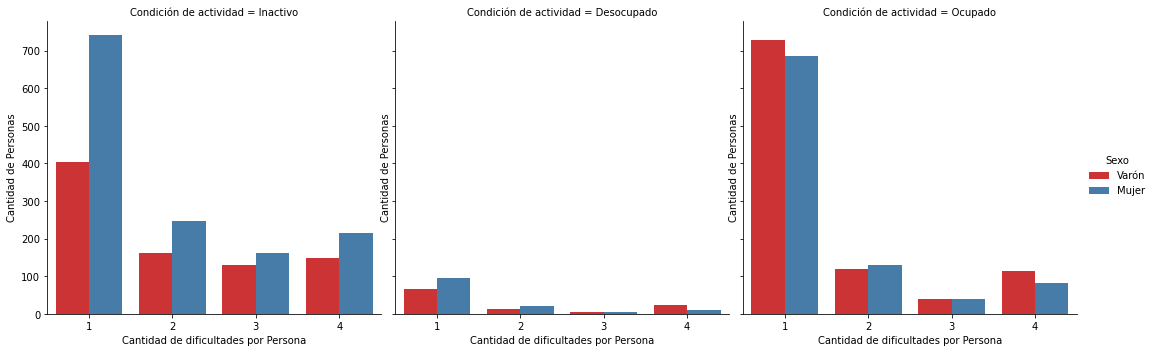

In [20]:
plt.figure(figsize=(14,6))
ax = sns.catplot(x="Cantidad de dificultades", hue = "Sexo"  ,col = "Condición de actividad", data=estudio_discapacidad ,kind="count", palette = 'Set1')
ax.set(xlabel="Cantidad de dificultades por Persona", ylabel = "Cantidad de Personas")

plt.show()

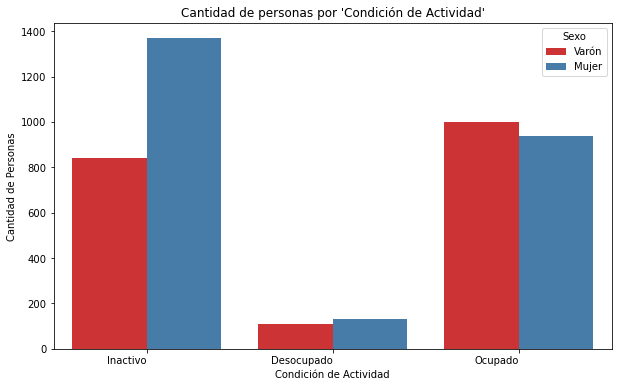

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Condición de actividad", hue = "Sexo" , data=estudio_discapacidad , palette = 'Set1')
ax.set(xlabel="Condición de Actividad", ylabel = "Cantidad de Personas")
ax.set_xticklabels(ax.get_xticklabels(),  ha="right")
plt.title("Cantidad de personas por 'Condición de Actividad'")
plt.show()

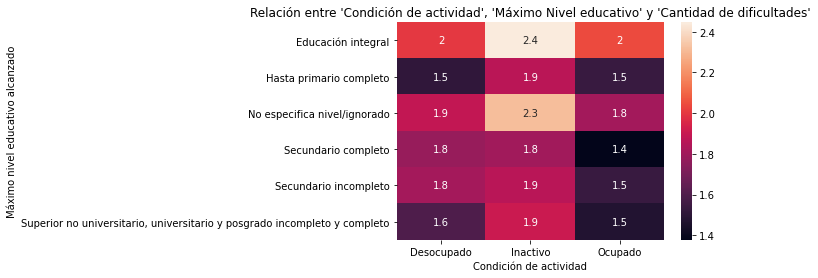

In [22]:
heatmap1_data = pd.pivot_table(estudio_discapacidad,  values='Cantidad de dificultades', 
                     index=['Máximo nivel educativo alcanzado'], 
                     columns='Condición de actividad')
plt.title("Relación entre 'Condición de actividad', 'Máximo Nivel educativo' y 'Cantidad de dificultades'")
sns.heatmap(heatmap1_data, annot =True)


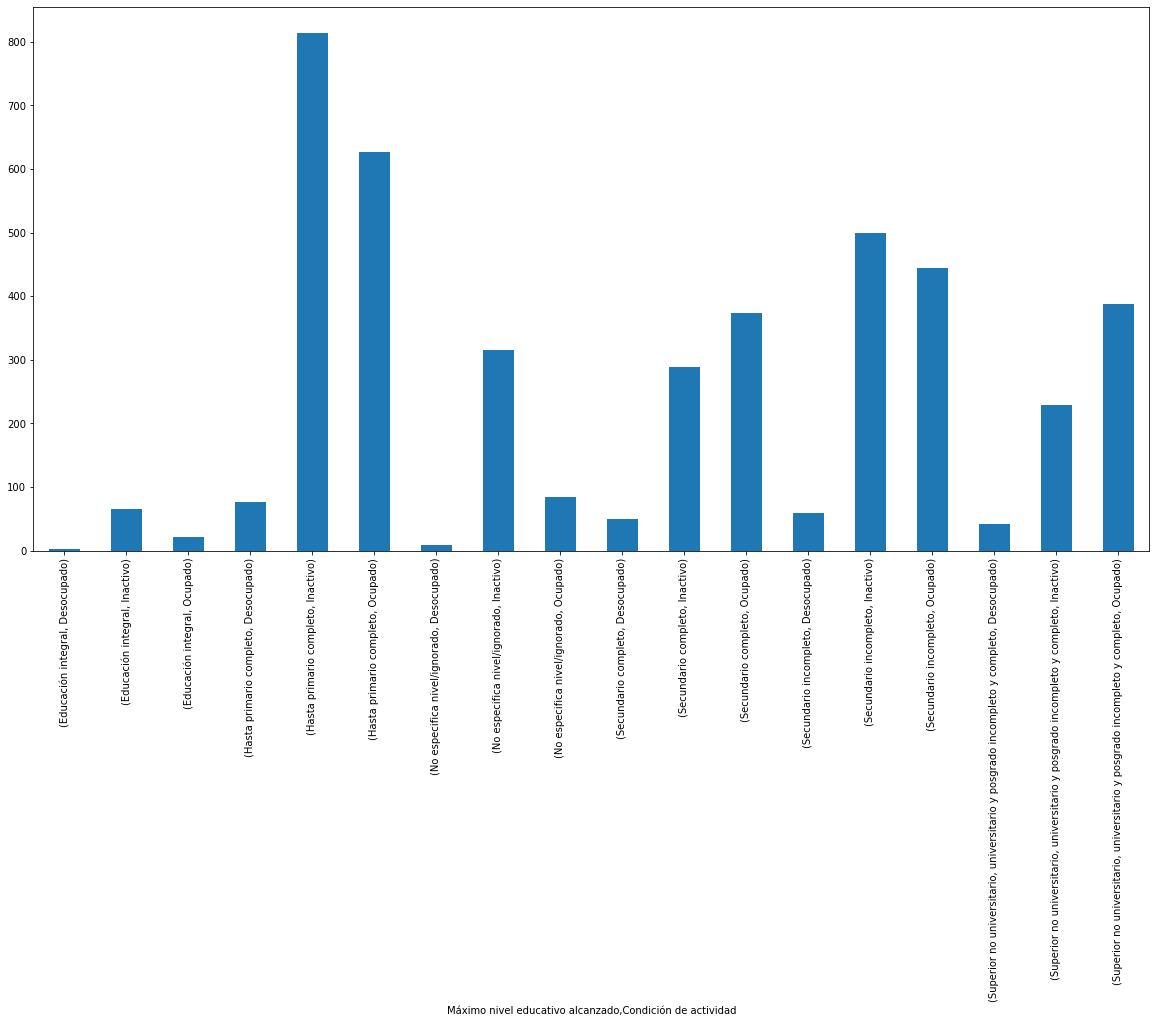

In [23]:
estudio_discapacidad.groupby(['Máximo nivel educativo alcanzado', 'Condición de actividad']).size().plot(kind='bar', figsize=(20,10))
plt.show()

In [24]:
# Creamos un Dataframe con los datos obtenidos del 'Group By' para poder plotearlos

# Creamos un diccionario
ex_dict = {
    'Máximo nivel educativo alcanzado': ['Educación integral', 'Educación integral', 'Educación integral','Hasta primario completo','Hasta primario completo','Hasta primario completo','No especifica nivel/ignorado', 'No especifica nivel/ignorado' , 'No especifica nivel/ignorado', 'Secundario completo' , 'Secundario completo' , 'Secundario completo', 'Secundario incompleto', 'Secundario incompleto', 'Secundario incompleto' , 'Superior no universitario, universitario y posgrado incompleto y completo', 'Superior no universitario, universitario y posgrado incompleto y completo', 'Superior no universitario, universitario y posgrado incompleto y completo'  ],
    'Condición de actividad': ['Desocupado', 'Inactivo', 'Ocupado','Desocupado', 'Inactivo', 'Ocupado','Desocupado', 'Inactivo', 'Ocupado','Desocupado', 'Inactivo', 'Ocupado','Desocupado', 'Inactivo', 'Ocupado' , 'Desocupado', 'Inactivo', 'Ocupado'],
    'Cantidades' : [3, 65, 22,76,814,627,9,315,84,50,289,373,59,500,444,42,229,388]
}
# Creamos las columnas
columns = ['Máximo nivel educativo alcanzado', 'Condición de actividad', 'Cantidades']

# Creamos un Dataframe
dfheat = pd.DataFrame(ex_dict, columns=columns)

# Pasamos los valores de 'Cantidades' de variables object a numeros 'int'
dfheat['Cantidades'] = dfheat['Cantidades'].astype(int)
dfheat

,Máximo nivel educativo alcanzado,Condición de actividad,Cantidades
0,Educación integral,Desocupado,3
1,Educación integral,Inactivo,65
2,Educación integral,Ocupado,22
3,Hasta primario completo,Desocupado,76
4,Hasta primario completo,Inactivo,814
5,Hasta primario completo,Ocupado,627
6,No especifica nivel/ignorado,Desocupado,9
7,No especifica nivel/ignorado,Inactivo,315
8,No especifica nivel/ignorado,Ocupado,84
9,Secundario completo,Desocupado,50


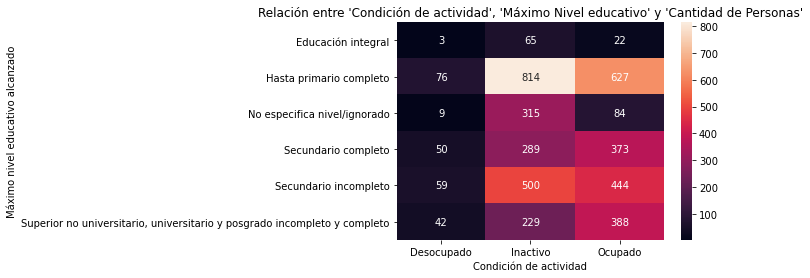

In [25]:
heatmap2_data = pd.pivot_table(dfheat,  values='Cantidades', 
                     index=['Máximo nivel educativo alcanzado'], 
                     columns='Condición de actividad')
plt.title("Relación entre 'Condición de actividad', 'Máximo Nivel educativo' y 'Cantidad de Personas'")
sns.heatmap(heatmap2_data, annot =True, fmt="d")

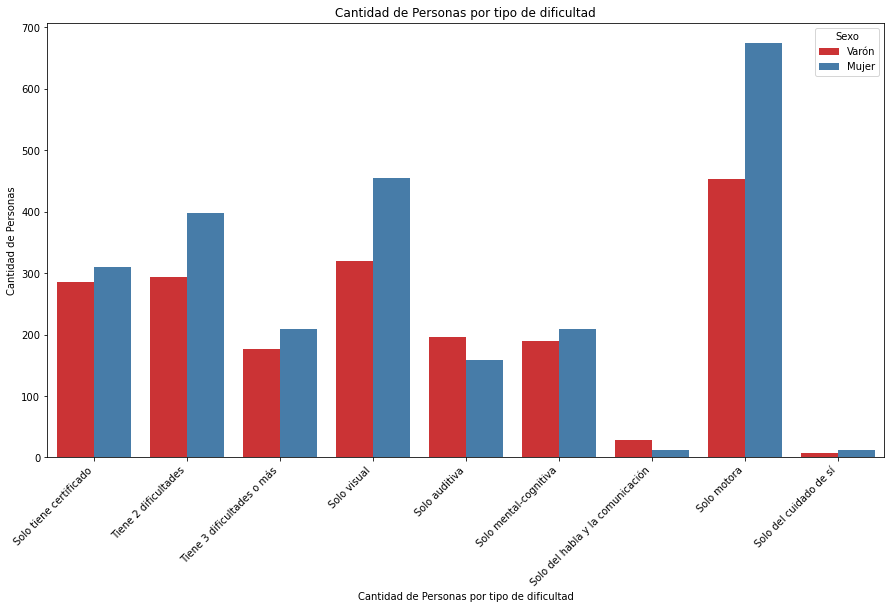

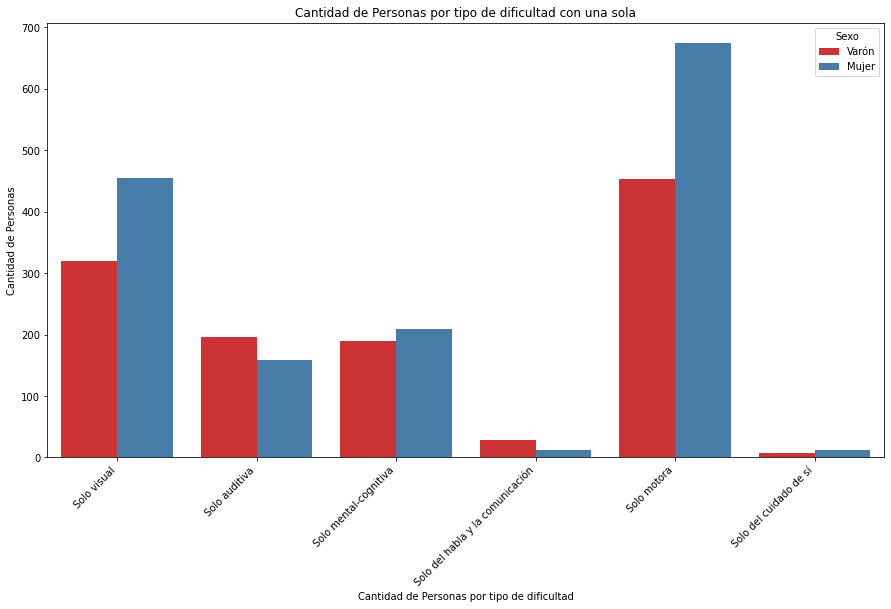

In [26]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="Cantidad y tipo de dificultad", hue ="Sexo", data=estudio_discapacidad , palette = 'Set1')
ax.set(xlabel="Cantidad de Personas por tipo de dificultad", ylabel = "Cantidad de Personas" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Cantidad de Personas por tipo de dificultad")
plt.show()

plt.figure(figsize=(15,8))
ax = sns.countplot(x="Cantidad y tipo de dificultad", hue ="Sexo", order = [ 'Solo visual' , 'Solo auditiva' , 'Solo mental-cognitiva' , 'Solo del habla y la comunicación' , 'Solo motora' , 'Solo del cuidado de sí'] , data=estudio_discapacidad , palette = 'Set1')
ax.set(xlabel="Cantidad de Personas por tipo de dificultad", ylabel = "Cantidad de Personas" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Cantidad de Personas por tipo de dificultad con una sola")
plt.show()

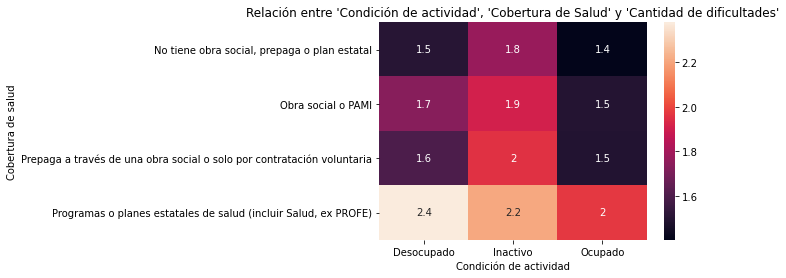

In [27]:
heatmap1_data = pd.pivot_table(estudio_discapacidad,  values='Cantidad de dificultades', 
                     index=['Cobertura de salud'], 
                     columns='Condición de actividad')
plt.title("Relación entre 'Condición de actividad', 'Cobertura de Salud' y 'Cantidad de dificultades'")
sns.heatmap(heatmap1_data, annot =True)


<Figure size 720x432 with 0 Axes>

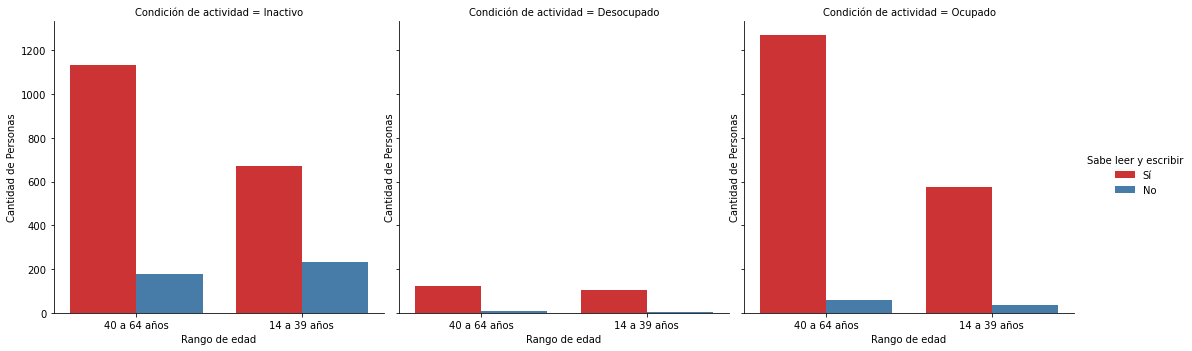

In [28]:
plt.figure(figsize=(10,6))
ax = sns.catplot(x="edad_agrupada", hue ="Sabe leer y escribir" ,col = "Condición de actividad", data=estudio_discapacidad ,kind="count", palette = 'Set1')
ax.set(xlabel="Rango de edad", ylabel = "Cantidad de Personas" )

plt.show()

Text(0.5, 1.0, "Distrbución de la 'Cantidad de dificultades' por Rango de edad")

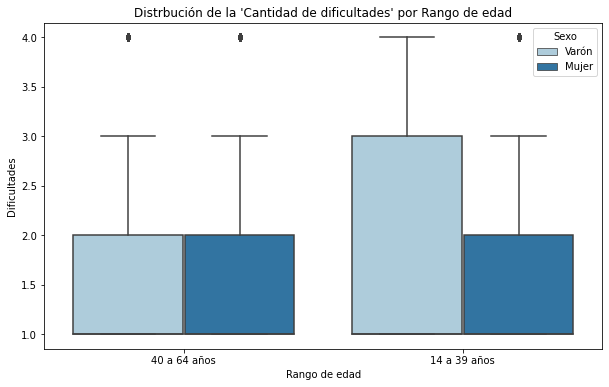

In [29]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="edad_agrupada", y="Cantidad de dificultades", hue = "Sexo" , data=estudio_discapacidad , palette = 'Paired')
ax.set(xlabel="Rango de edad", ylabel = "Dificultades" )
plt.title("Distrbución de la 'Cantidad de dificultades' por Rango de edad")

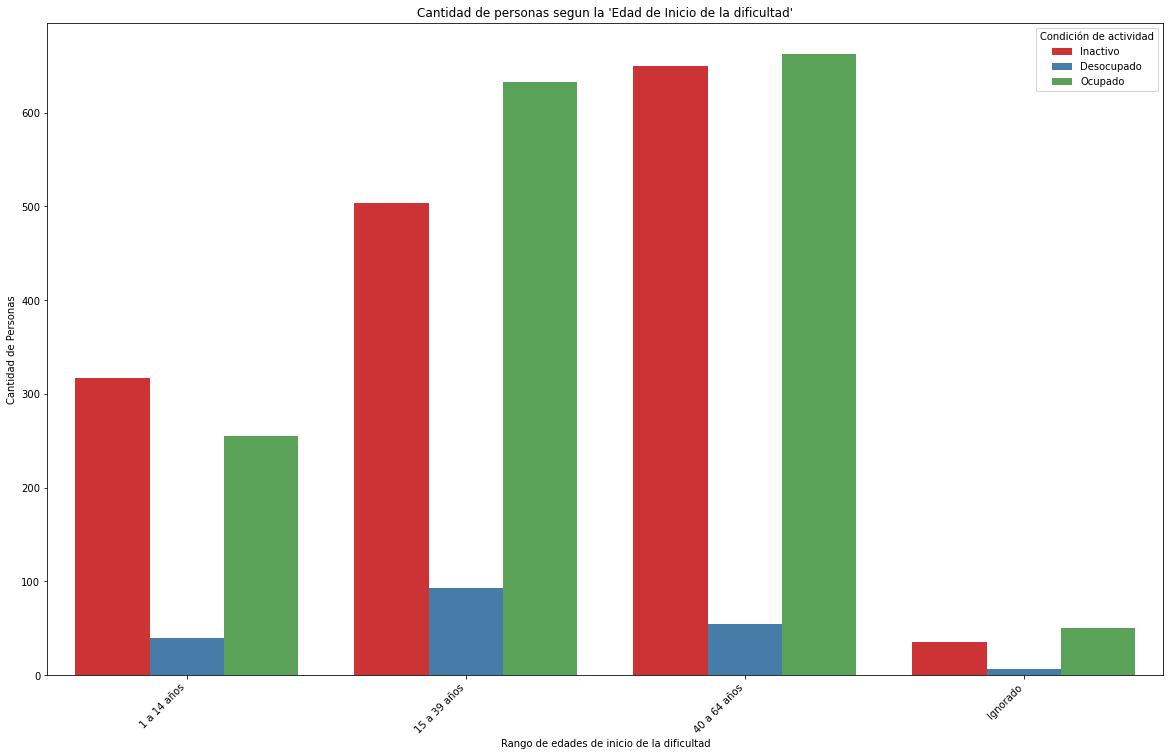

In [30]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x="edad_inicio", hue ="Condición de actividad" , data=estudio_discapacidad , order = [ '1 a 14 años' , '15 a 39 años' , '40 a 64 años' , 'Ignorado'] , palette = 'Set1')
ax.set(xlabel="Rango de edades de inicio de la dificultad", ylabel = "Cantidad de Personas" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Cantidad de personas segun la 'Edad de Inicio de la dificultad'")
plt.show()

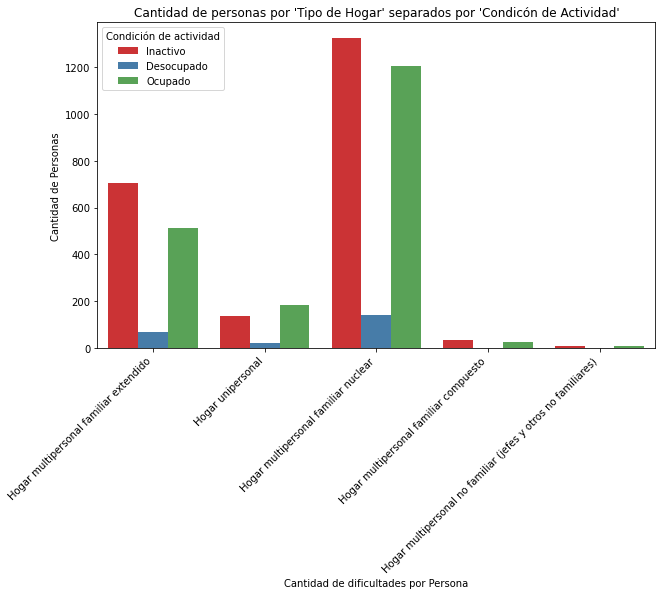

In [31]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="tipo_hogar", hue ="Condición de actividad" , data=estudio_discapacidad, palette = 'Set1' )
ax.set(xlabel="Cantidad de dificultades por Persona", ylabel = "Cantidad de Personas" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Cantidad de personas por 'Tipo de Hogar' separados por 'Condicón de Actividad'")
plt.show()